# Task 2.4 Fundamentals of Visualizations with Python

#### 1. Install Libraries
#### 2. Read in dataset from previous task
#### 3. Data wrangling
#### 4. Create a bar chart of the top 20 starting stations frequencies
#### 5. Recreate the dual-axis line plot from the previous Exercise using seaborn
#### 6. Make a box plot of one of the categorical variables in your data set
#### 7. Create a FacetGrid plot that would make sense to aid the analysis questions in the project
#### 8. Save plots as file

### 1. Install Libraries

In [1]:
# Installing libraries
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates  
import numpy as np
from datetime import datetime as dt
import seaborn as sns

### 2. Read in dataset from previous task

In [2]:
# Importing LaGuardia_data.csv file
df = pd.read_csv('LaGuardia_data.csv')

/var/folders/qg/tbv61t9j3ngdmw6m2qtbk34w0000gn/T/ipykernel_1611/2892705336.py:2: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('LaGuardia_data.csv')


### 3. Data wrangling

In [3]:
df.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
avgTemp               float64
bike_rides_daily        int64
_merge                 object
date                   object
month                   int64
dtype: object

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', '_merge', 'date',
       'month'],
      dtype='object')


In [5]:
# Dropping '_merge' and 'Unnamed: 0' columns
df.drop(columns = {'_merge', 'Unnamed: 0'}, inplace = True)

In [6]:
print(df.columns)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily', 'date', 'month'],
      dtype='object')


In [7]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
avgTemp                      float64
bike_rides_daily               int64
date                  datetime64[ns]
month                          int64
dtype: object

### 4. Create a bar chart of the top 20 starting stations frequencies

In [9]:
# Create a new column value
df['value'] = 1

In [10]:
# Grouping df by 'start_station_name'
df_temp = df.groupby('start_station_name')['value'].count().reset_index()

In [11]:
df_temp

,start_station_name,value
0,1 Ave & E 110 St,21526
1,1 Ave & E 16 St,67349
2,1 Ave & E 18 St,70854
3,1 Ave & E 30 St,45412
4,1 Ave & E 39 St,52373
...,...,...
1756,Wyckoff Ave & Gates Ave,16556
1757,Wyckoff St & 3 Ave,250
1758,Wyckoff St & Nevins St,11527
1759,Wythe Ave & Metropolitan Ave,66468


In [12]:
# Create top 20 of 'start_station_name'
top20 = df_temp.nlargest(20, 'value')

In [13]:
top20

,start_station_name,value
1587,W 21 St & 6 Ave,129016
1718,West St & Chambers St,123289
495,Broadway & W 58 St,114293
286,6 Ave & W 33 St,106440
8,1 Ave & E 68 St,104856
461,Broadway & E 14 St,98862
485,Broadway & W 25 St,98422
1511,University Pl & E 14 St,97120
463,Broadway & E 21 St,95691
1603,W 31 St & 7 Ave,94208


In [14]:
top20.to_csv("top_20b.csv")

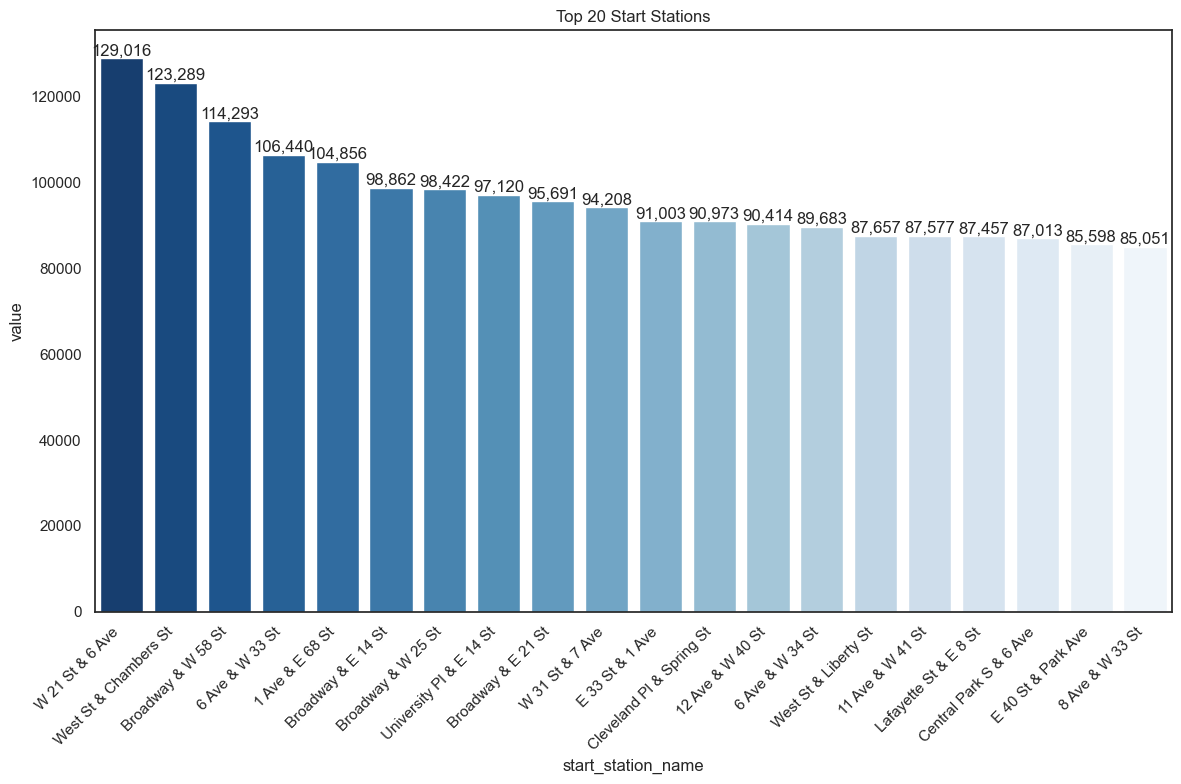

In [15]:
# Set the theme
sns.set_theme(style="white")

# Set the figure size to make the chart less cluttered
plt.figure(figsize=(12, 8))

# Create the barplot with explicit hue and disable the legend
ax = sns.barplot(data=top20, x='start_station_name', y='value', palette="Blues_r", hue='start_station_name', dodge=False, legend=False)

# Set the title
plt.title("Top 20 Start Stations")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add numerical labels with commas
for container in ax.containers:
    ax.bar_label(container, fmt='{:,.0f}', label_type='edge')

# Adjust layout to fit elements better
plt.tight_layout()

# Save the plot in high resolution
plt.savefig('bar_plot_top_20_start_stations.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 5. Recreate the dual-axis line plot from the previous Exercise using seaborn

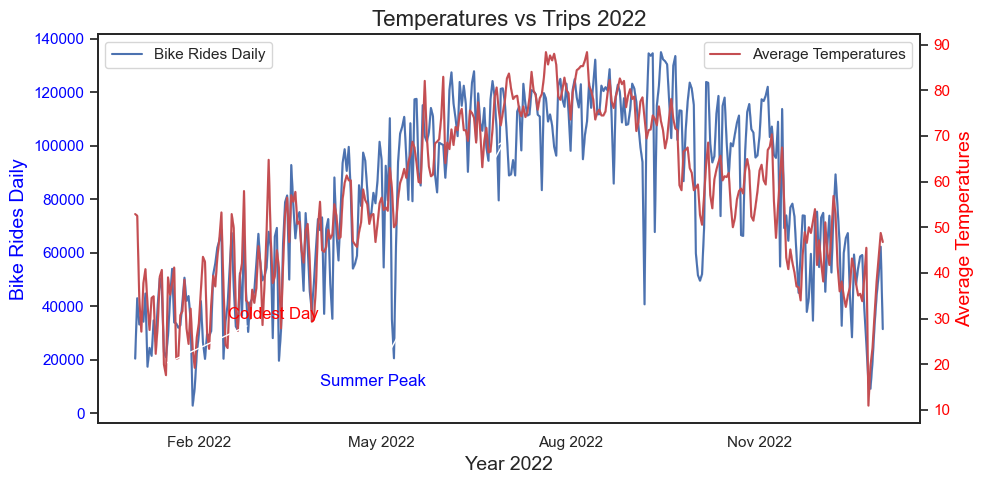

In [16]:
# Keeping the same theme and palette from Bar chart
sns.set_theme(style="white", palette="Blues_r")

# Ensure the date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create the dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# First line plot (Bike Rides Daily)
sns.lineplot(data=df, x='date', y='bike_rides_daily', ax=ax1, color="b", label="Bike Rides Daily")
ax1.set_xlabel("Year 2022", fontsize=14)
ax1.set_ylabel("Bike Rides Daily", color="blue", fontsize=14)
ax1.tick_params(axis='y', labelcolor="blue")
ax1.legend(loc="upper left")

# Second y-axis for dual-axis plot (Average Temperatures)
ax2 = ax1.twinx()
sns.lineplot(data=df, x='date', y='avgTemp', ax=ax2, color="r", label="Average Temperatures")
ax2.set_ylabel("Average Temperatures", color="red", fontsize=14)
ax2.tick_params(axis='y', labelcolor="red")
ax2.legend(loc="upper right")

# Set x-axis to ticks every 3 months
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  

# Format x-axis to display the month name and year (e.g., Jan 2022)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  

# Rotate x-axis labels for readability
plt.xticks(rotation=45)  

# Title and layout
plt.title("Temperatures vs Trips 2022", fontsize=16)

# Add annotations to highlight trends or correlations
ax1.annotate("Summer Peak", 
             xy=(pd.Timestamp('2022-07-01'), df.loc[df['date'] == pd.Timestamp('2022-07-01'), 'bike_rides_daily'].values[0]), 
             xytext=(pd.Timestamp('2022-04-01'), 10000),  # Adjust xytext for placement
             arrowprops=dict(facecolor='blue', arrowstyle="->"),
             fontsize=12, color="blue")

ax2.annotate("Coldest Day", 
             xy=(pd.Timestamp('2022-01-15'), df.loc[df['date'] == pd.Timestamp('2022-01-15'), 'avgTemp'].values[0]), 
             xytext=(pd.Timestamp('2022-02-15'), 30),  # Adjust xytext for placement
             arrowprops=dict(facecolor='red', arrowstyle="->"),
             fontsize=12, color="red")

# Adjust layout to fit elements better
plt.tight_layout()

# Save the plot in high resolution
plt.savefig('duel_axis_line_plot_temps_vs_trips_2022.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

### 6. Make a box plot of one of the categorical variables in your data set

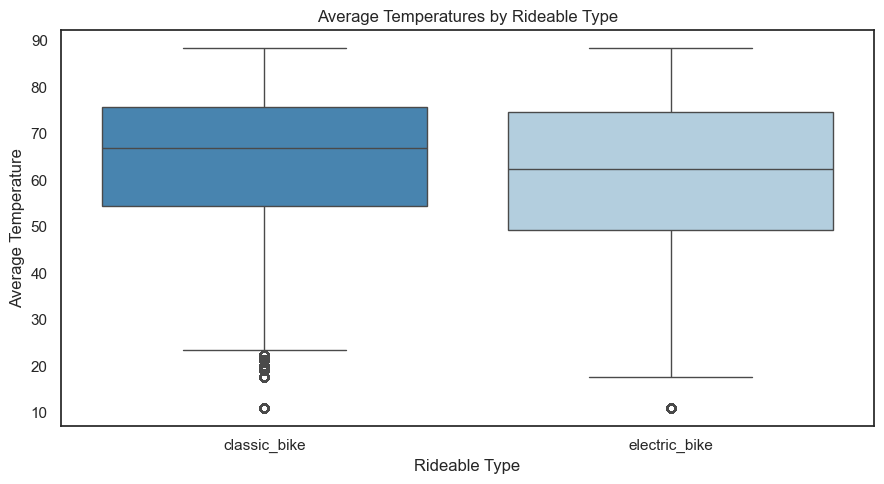

In [17]:
# Set the same theme and palette for consistency
sns.set_theme(style="white", palette="Blues_r")

# Create Box plot
plt.figure(figsize=(9, 5))
sns.boxplot(x='rideable_type', y='avgTemp', data=df, hue='rideable_type', palette="Blues_r", dodge=False, legend=False)
plt.title("Average Temperatures by Rideable Type")  
plt.xlabel("Rideable Type")  
plt.ylabel("Average Temperature") 

# Save the plot in high resolution
plt.tight_layout()
plt.savefig('boxplot_average_temperatures.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

#### Q6 comment: The box plot highlights differences in temperature variability for classic_bike and electric_bike rides. Electric bikes exhibit a wider interquartile range (IQR), reflecting greater variability, likely due to their motor-assisted features, which make them more suitable for diverse conditions and longer distances. Casual users may also favor electric bikes for leisure rides in varying weather, further contributing to this variability. In contrast, classic bikes show a narrower IQR and are used more consistently in moderate conditions, with fewer rides in extreme weather due to their reliance on rider effort. This suggests that classic bikes are preferred by regular commuters, while electric bikes cater to a broader range of use cases and conditions.

### 7. Create a FacetGrid plot that would make sense to aid the analysis questions in the project

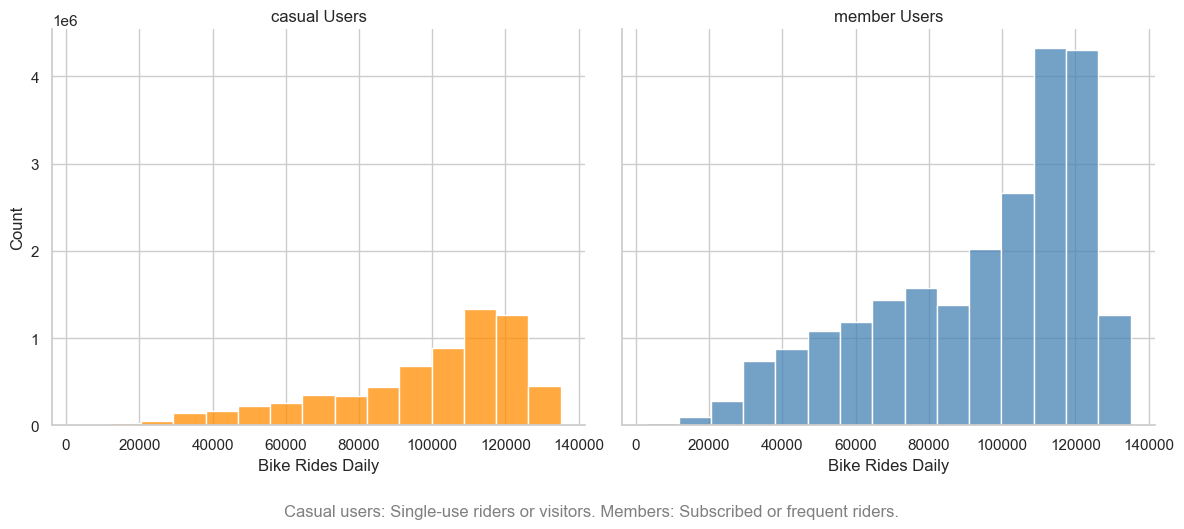

In [18]:
# Set theme for clean visuals
sns.set_theme(style="whitegrid")

# Define a custom color palette for the "member_casual" categories
palette = {"member": "steelblue", "casual": "darkorange"}

# Create FacetGrid
grid = sns.FacetGrid(df, col="member_casual", height=5, aspect=1.2)

# Map histograms with custom colors to the grid
for col_value, ax in zip(df['member_casual'].unique(), grid.axes.flat):
    sns.histplot(
        data=df[df['member_casual'] == col_value],
        x="bike_rides_daily",
        bins=15,
        color=palette[col_value],
        ax=ax)

# Add labels and titles
grid.set_axis_labels("Bike Rides Daily", "Count")
grid.set_titles("{col_name} Users")  

# Add a legend below the grid explaining user categories
plt.figtext(0.5, -0.05,"Casual users: Single-use riders or visitors. Members: Subscribed or frequent riders.",
    ha="center", fontsize=12, color="gray")

# Adjust layout and save the plot in high resolution
plt.tight_layout()
grid.savefig('facetgrid_histograms_with_legend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

#### Q7 comment:  The histogram shows a clear difference in the distribution of daily bike rides between casual and member users. Casual users tend to have lower daily ride volumes, with most values concentrated below 100,000 rides. Member users have significantly higher ride volumes, with peaks around 120,000 rides daily, indicating that members contribute far more to bike usage than casual users. 

#### Summary:  The analyses provide key insights into bike usage patterns based on location, weather, bike type, and user demographics. The bar chart shows the top 20 start stations, with W 21 St & 6 Ave being the busiest at over 129,000 rides, highlighting activity in key areas likely driven by commuting patterns and accessibility. The dual-axis line plot reveals a clear seasonal trend: bike rides peak during warmer summer months and drop significantly in colder conditions, emphasizing the strong influence of temperature on usage. The box plot highlights greater variability in temperatures for electric bikes, likely due to their versatility and appeal to casual riders, while classic bikes show more consistent usage, preferred by regular commuters in moderate weather. Finally, the histogram demonstrates a stark difference in ride volumes between casual and member users, with members contributing significantly more, peaking around 120,000 daily rides, whereas casual users exhibit lower ride frequencies. Together, these insights reveal how external factors and user preferences shape bike-sharing behavior.